In [2]:
# Image compression by SVD
# 2017,2018 Tsuyoshi Okubo
# 2019 modified by Tsuyoshi Okubo

By using the low rank approximation through SVD, perform data compression of a gray scale image. 

You can change sample image by modifying file open "sample.jpg".

Also, you can set the rank of approximation by varying "chi".

Let's see, how the image changes when you change the rank.

In [3]:
## import libraries
from PIL import Image ## Python Imaging Library
import numpy as np ## numpy
%matplotlib inline
from matplotlib import pyplot


In [4]:
img = Image.open("./sample.jpg") ## load image
img_gray = img.convert("L") ## convert to grayscale
img_gray.show(title="Original") ## show image in external window
img_gray.save("./gray.png") ## save grayscale image
#img_gray.save("./gray.jpg") ## save grayscale image in jpg

In [5]:
array = np.array(img_gray,dtype=float) ## convert to ndarray
print("Array shape:" +repr(array.shape)) ## print array shape

Array shape:(768, 1024)


In [6]:
u,s,vt = np.linalg.svd(array,full_matrices=False) ## svd 


In [7]:
#truncation
chi = 10
u = u[:,:chi]
vt = vt[:chi,:]
st = s[:chi]


In [8]:
array_truncated = np.dot(np.dot(u,np.diag(st)),vt) ## make truncated array
normalized_distance = np.sqrt(np.sum((array-array_truncated)**2))/np.sqrt(np.sum(array**2))
print("Low rank approximation with chi=" +repr(chi))
print("Normalized distance:" +repr(normalized_distance)) ## print normalized distance

Low rank approximation with chi=10
Normalized distance:0.10087303978176489


In [9]:
img_gray_truncated = Image.fromarray(np.uint8(np.clip(array_truncated,0,255))) ## convert to grayscale image


In [10]:
img_gray_truncated.show(title="Truncated") ## show image in external window
img_gray_truncated.save("./gray_truncated.png") ## save compressed image
#img_gray_truncated.save("./gray_truncated.jpg") ## save compressed image in jpg

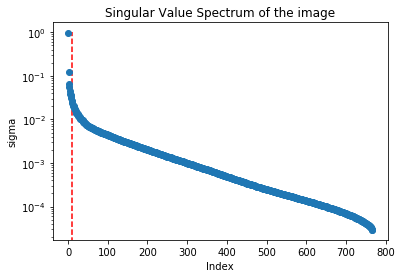

In [13]:
## normalization of singular values
s = s/np.sqrt(np.sum(s**2))

output_sv = len(s) ## number of singular values to output
pyplot.title("Singular Value Spectrum of the image")
pyplot.plot(np.arange(output_sv),s[:output_sv],"o")
pyplot.vlines([chi],0,1,  "red", linestyles='dashed') ## position of chi
pyplot.xlabel("Index")
pyplot.ylabel("sigma")
pyplot.yscale("log")
pyplot.show()


expected distance at chi 0.10087303978176489


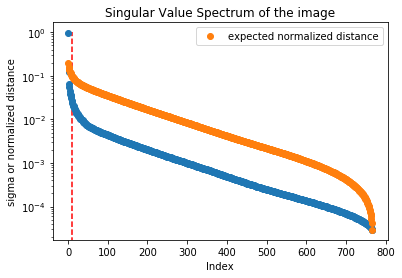

In [14]:
### plot of expected normalized distances ###
cum_s2 = np.sqrt(np.cumsum(s[::-1]**2)[::-1])
cum_s = np.zeros(len(cum_s2))
cum_s[:len(cum_s2)-1]=cum_s2[1:]
print("expected distance at chi "+repr(cum_s[chi-1]))

pyplot.title("Singular Value Spectrum of the image")
pyplot.plot(np.arange(output_sv),s[:output_sv],"o")
pyplot.vlines([chi],0,1,  "red", linestyles='dashed') ## position of chi
pyplot.xlabel("Index")
pyplot.ylabel("sigma or normalized distance")
pyplot.yscale("log")
pyplot.plot(cum_s,"o",label="expected normalized distance")
pyplot.legend()    
pyplot.show()
